In [1]:
import pnet_loader
import util
import torch
import seaborn as sns
import pandas as pd
import Pnet
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

%load_ext autoreload
%autoreload 2

In [52]:
lusc_exp

Hugo_Symbol,UBE2Q2P2,HMGB1P1,RNU12-2P,SSX9P,EZHIP,EFCAB8,SRP14P1,TRIM75P,SPATA31B1P,REXO1L6P,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-18-3406-01,25.4252,279.9760,0.0000,0.0,0.0000,4.7244,10.2362,3.1496,0.0000,0.0,...,475.402,500.787,75.5906,403.937,428.346,2.3622,986.614,1914.960,265.354,738.583
TCGA-18-3407-01,6.9933,198.2540,0.0000,0.0,0.0000,0.9515,3.8059,0.0000,0.0000,0.0,...,401.808,415.319,42.8164,303.996,1270.220,5.7088,854.424,4221.690,702.664,960.990
TCGA-18-3408-01,3.3754,254.5930,1.7796,0.0,0.0000,0.0000,7.7117,0.0000,0.0000,0.0,...,468.634,791.339,51.0159,377.280,944.980,8.3049,643.037,526.175,589.649,757.526
TCGA-18-3410-01,19.5722,200.8030,0.0000,0.0,2.3633,7.8777,3.1511,0.0000,0.0000,0.0,...,1523.460,1720.500,40.5703,239.877,1036.320,161.8870,711.753,3029.770,735.780,884.275
TCGA-18-3411-01,14.4142,277.6670,0.4023,0.0,0.4023,0.0000,6.0344,0.0000,0.0000,0.0,...,943.377,948.205,35.8041,255.054,683.898,3.6206,539.073,2832.950,321.432,966.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-O2-A52S-01,47.1026,176.7180,1.6556,0.0,0.8278,2.4834,0.8278,0.0000,0.0000,0.0,...,1074.400,2039.740,65.3974,507.450,1392.800,126.2420,580.298,2681.710,1069.540,783.113
TCGA-O2-A52V-01,15.2957,188.7210,0.4202,0.0,4.2021,5.8830,2.5213,0.0000,0.0000,0.0,...,621.355,1340.060,52.9467,366.845,1326.610,6.3032,845.887,6094.340,663.935,778.653
TCGA-O2-A52W-01,33.3907,260.3330,0.0000,0.0,0.5373,6.4481,5.9108,0.0000,0.0000,0.0,...,598.603,1051.050,45.1370,336.916,2002.690,101.5580,613.649,2560.990,730.253,761.956
TCGA-O2-A5IB-01,42.1832,160.1620,1.3312,0.0,0.7987,2.1299,4.7923,0.2662,0.2662,0.0,...,428.922,1546.860,91.3206,584.132,2074.550,150.4260,1155.220,1185.040,833.333,1383.120


In [54]:
lusc_exp = pd.read_csv('../data/lusc_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem.txt',
                           sep='\t').dropna().set_index('Hugo_Symbol').drop(['Entrez_Gene_Id'], axis=1).T
lusc_exp.sum(axis=1)

TCGA-18-3406-01    2.864385e+07
TCGA-18-3407-01    2.009539e+07
TCGA-18-3408-01    1.990446e+07
TCGA-18-3410-01    1.928810e+07
TCGA-18-3411-01    2.186567e+07
                       ...     
TCGA-O2-A52S-01    1.882818e+07
TCGA-O2-A52V-01    1.977241e+07
TCGA-O2-A52W-01    1.962326e+07
TCGA-O2-A5IB-01    1.744805e+07
TCGA-XC-AA0X-01    1.996999e+07
Length: 484, dtype: float64

In [7]:
def load_lusc_luad_exp():
    lusc_exp = pd.read_csv('../data/lusc_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem.txt',
                           sep='\t').dropna().set_index('Hugo_Symbol').drop(['Entrez_Gene_Id'], axis=1).T
    lusc_exp = lusc_exp.loc[:,~lusc_exp.columns.duplicated()].copy()
    drop_list = []
    for col in lusc_exp.columns:
        if len(lusc_exp[col].value_counts()) < 400:
            drop_list.append(col)
    lusc_exp.drop(drop_list, axis=1, inplace=True)
    lusc_exp['tumor'] = 0

    luad_exp = pd.read_csv('../data/luad_tcga_pan_can_atlas_2018/data_mrna_seq_v2_rsem.atxt',
                          sep='\t').dropna().set_index('Hugo_Symbol').drop(['Entrez_Gene_Id'], axis=1).T
    luad_exp = luad_exp.loc[:,~luad_exp.columns.duplicated()].copy()
    drop_list = []
    for col in luad_exp.columns:
        if len(luad_exp[col].value_counts()) < 400:
            drop_list.append(col)
    luad_exp.drop(drop_list, axis=1, inplace=True)
    luad_exp['tumor'] = 1
    tumor_dict = {0: 'LUSC', 1:'LUAD'}
    genes = list(set(lusc_exp.columns.values).intersection(luad_exp.columns.values))
    lusc_exp = lusc_exp[genes]
    luad_exp = luad_exp[genes]
    exp_data = pd.concat([luad_exp, lusc_exp])
    y = exp_data[['tumor']]
    exp_data.drop(['tumor'], axis=1, inplace=True)
    gene_set = util.select_highly_variable_genes(exp_data)['Hugo_Symbol']
    return exp_data[gene_set], y

In [8]:
lusc_luad_rna_exp, tumor_type = load_lusc_luad_exp()
lusc_luad_rna_exp = (lusc_luad_rna_exp-lusc_luad_rna_exp.mean())/lusc_luad_rna_exp.std()

lusc_cna = pd.read_csv('../data/lusc_tcga_pan_can_atlas_2018/data_cna.txt', sep='\t').set_index('Hugo_Symbol')
luad_cna = pd.read_csv('../data/luad_tcga_pan_can_atlas_2018/data_cna.txt', sep='\t').set_index('Hugo_Symbol')

lusc_cna = lusc_cna.loc[list(set(lusc_luad_rna_exp.columns).intersection(lusc_cna.index))].T
luad_cna = luad_cna.loc[list(set(lusc_luad_rna_exp.columns).intersection(luad_cna.index))].T

lusc_luad_cna = pd.concat([luad_cna, lusc_cna])

In [9]:
genetic_data = {'rna': lusc_luad_rna_exp}
# genetic_data = {'rna': lusc_luad_rna_exp, 'cna': lusc_luad_cna}

In [10]:
model, train_scores, test_scores, train_dataset, test_dataset = Pnet.run(genetic_data,
                                                                         tumor_type,
                                                                         verbose=True,
                                                                         early_stopping=False)

Given 1 Input modalities
Found 994 overlapping indicies
Initializing Train Dataset
Found 1000 overlapping genes
generated input DataFrame of size (696, 1000)
Initializing Test Dataset
Found 1000 overlapping genes
generated input DataFrame of size (298, 1000)
Found 1000 overlapping genes
Epoch 1 of 300
Train scores: (0.6915003897129804, 0.5172413793103449)
Test scores: (0.7009151189919286, 0.5100671140939598)
Epoch 2 of 300
Train scores: (0.6720216794945728, 0.5474137931034483)
Test scores: (0.6999618863099374, 0.5100671140939598)
Epoch 3 of 300
Train scores: (0.6555584271748861, 0.6005747126436781)
Test scores: (0.6990584239063647, 0.5100671140939598)
Epoch 4 of 300
Train scores: (0.6329129536946615, 0.7227011494252874)
Test scores: (0.6979854826959188, 0.5100671140939598)
Epoch 5 of 300
Train scores: (0.612157399626984, 0.7988505747126436)
Test scores: (0.6931797962060711, 0.5100671140939598)
Epoch 6 of 300
Train scores: (0.5835324813579691, 0.8721264367816092)
Test scores: (0.6828093

Epoch 64 of 300
Train scores: (0.2052964986055747, 0.9597701149425287)
Test scores: (0.21579828518349053, 0.9395973154362416)
Epoch 65 of 300
Train scores: (0.20551578614903593, 0.9597701149425287)
Test scores: (0.21806644913334175, 0.9395973154362416)
exceeded delta
Epoch 66 of 300
Train scores: (0.19745167370500236, 0.9655172413793104)
Test scores: (0.21080112777300328, 0.9429530201342282)
Epoch 67 of 300
Train scores: (0.19796167433946982, 0.9597701149425287)
Test scores: (0.21471848263836546, 0.9395973154362416)
exceeded delta
Epoch 68 of 300
Train scores: (0.20301654695094318, 0.9612068965517241)
Test scores: (0.2136229476672691, 0.9395973154362416)
exceeded delta
Epoch 69 of 300
Train scores: (0.20118429331943907, 0.9626436781609196)
Test scores: (0.2106414993337337, 0.9395973154362416)
Epoch 70 of 300
Train scores: (0.19827919581840778, 0.9554597701149425)
Test scores: (0.20743226364955006, 0.9395973154362416)
Epoch 71 of 300
Train scores: (0.1981151199888909, 0.9583333333333334

Epoch 127 of 300
Train scores: (0.16033721381220326, 0.9698275862068966)
Test scores: (0.19443119612316156, 0.9362416107382551)
exceeded delta
Epoch 128 of 300
Train scores: (0.15454432471045132, 0.9640804597701149)
Test scores: (0.19347492640450498, 0.9328859060402684)
exceeded delta
Epoch 129 of 300
Train scores: (0.152891608490341, 0.9655172413793104)
Test scores: (0.19314393101122557, 0.9328859060402684)
exceeded delta
Epoch 130 of 300
Train scores: (0.15871676905401821, 0.9655172413793104)
Test scores: (0.19228126538679904, 0.9362416107382551)
exceeded delta
Epoch 131 of 300
Train scores: (0.15750055340514785, 0.9640804597701149)
Test scores: (0.1862383560846316, 0.9362416107382551)
Epoch 132 of 300
Train scores: (0.15423212037689385, 0.9640804597701149)
Test scores: (0.1850815107358382, 0.9362416107382551)
Epoch 133 of 300
Train scores: (0.17375863694596563, 0.9497126436781609)
Test scores: (0.1865712652270426, 0.9395973154362416)
Epoch 134 of 300
Train scores: (0.184134825892832

Epoch 185 of 300
Train scores: (0.1585414039677587, 0.9525862068965517)
Test scores: (0.20918949178401255, 0.9395973154362416)
exceeded delta
Epoch 186 of 300
Train scores: (0.16970440437053813, 0.9540229885057471)
Test scores: (0.20701657365632536, 0.9261744966442953)
exceeded delta
Epoch 187 of 300
Train scores: (0.14872822131233654, 0.9626436781609196)
Test scores: (0.21013035230188562, 0.9261744966442953)
exceeded delta
Epoch 188 of 300
Train scores: (0.16248633601199622, 0.9554597701149425)
Test scores: (0.20431911225286906, 0.9328859060402684)
exceeded delta
Epoch 189 of 300
Train scores: (0.16818477299021578, 0.9482758620689655)
Test scores: (0.1980803300870345, 0.9362416107382551)
exceeded delta
Epoch 190 of 300
Train scores: (0.15824813815369004, 0.9525862068965517)
Test scores: (0.1917442891421734, 0.9395973154362416)
exceeded delta
Epoch 191 of 300
Train scores: (0.15852510106974635, 0.9554597701149425)
Test scores: (0.19257313133086135, 0.9328859060402684)
exceeded delta
Ep

Epoch 244 of 300
Train scores: (0.15079930527456875, 0.9612068965517241)
Test scores: (0.2016798297830876, 0.9362416107382551)
exceeded delta
Epoch 245 of 300
Train scores: (0.1407043330970852, 0.9669540229885057)
Test scores: (0.19526914142122204, 0.9328859060402684)
exceeded delta
Epoch 246 of 300
Train scores: (0.1582103323662418, 0.9511494252873564)
Test scores: (0.209187832454707, 0.9261744966442953)
exceeded delta
Epoch 247 of 300
Train scores: (0.15332452250623155, 0.9540229885057471)
Test scores: (0.2027877145165565, 0.9261744966442953)
exceeded delta
Epoch 248 of 300
Train scores: (0.16334576784879312, 0.9497126436781609)
Test scores: (0.19962445841539625, 0.9295302013422819)
exceeded delta
Epoch 249 of 300
Train scores: (0.15369807098103666, 0.9525862068965517)
Test scores: (0.20677598050776744, 0.9328859060402684)
exceeded delta
Epoch 250 of 300
Train scores: (0.13138482214390546, 0.9683908045977011)
Test scores: (0.2189863120149446, 0.9261744966442953)
exceeded delta
Epoch 

In [11]:
x_train = train_dataset.input_df.values
additional_train = train_dataset.additional_data.values
y_train = train_dataset.target.values.reshape(-1)
x_test = test_dataset.input_df.values
additional_test = test_dataset.additional_data.values
y_test = test_dataset.target.values.reshape(-1)

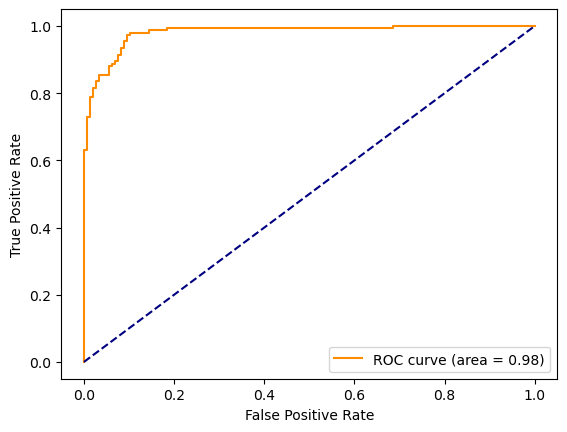

In [12]:
pred = model(torch.tensor(x_test, dtype=torch.float),
                          torch.tensor(additional_test, dtype=torch.float)
            )
y_pred_proba = pred.detach().numpy().squeeze()
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
test_auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve
plt.plot(fpr,tpr, color="darkorange", label="ROC curve (area = %0.2f)" % test_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
plt.legend(loc="lower right")
plt.savefig('PNET_subtype_val_ROC_curve.pdf')
plt.show()

In [13]:
gene_importances, additional_importances = model.deepLIFT(test_dataset)

/Users/marc/opt/anaconda3/envs/pnet/lib/python3.10/site-packages/captum/attr/_core/deep_lift.py:304: UserWarning: Setting forward, backward hooks and attributes on non-linear
               activations. The hooks and attributes will be removed
            after the attribution is finished
  warnings.warn(


In [14]:
gene_imp_by_target = gene_importances.join(test_dataset.target).groupby('tumor').mean().T
gene_imp_by_target['diff'] = gene_imp_by_target[0] - gene_imp_by_target[1]
gene_imp_by_target[abs(gene_imp_by_target['diff']) > 0].nlargest(10, 'diff')

tumor,0,1,diff
TARP,0.000000,-0.011142,0.011142
SYBU,-0.000108,-0.008288,0.008180
PEG10,0.000002,-0.007402,0.007405
MARCH9,0.000000,-0.006878,0.006878
PPYR1,0.001067,-0.005590,0.006658
VTN,0.000000,-0.005595,0.005595
TSPAN18,-0.000585,-0.006096,0.005510
MFI2,-0.000173,-0.004986,0.004812
SFTA3,-0.006967,-0.011740,0.004773
HIF3A,-0.002984,-0.007530,0.004545


In [15]:
gene_importances.sum().nlargest(20)

MIR205HG    6.847055
ADAM23      4.298070
BNC1        4.202657
FABP5       3.811802
SERPINB5    3.087897
SERPINB2    2.778071
CELSR2      2.635281
PITX1       2.620895
IL1A        2.542302
LAMA1       2.513666
COL4A5      2.462697
KRT5        2.281487
PCID2       1.971377
CEBPA       1.888193
TFRC        1.600306
IGF2BP2     1.515648
CTSB        1.495268
SLC2A1      1.351967
KRT6A       1.319320
HLA-C       1.233205
dtype: float32

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier()
clf.fit(train_dataset.input_df.values, train_dataset.target.values.reshape(-1))

RandomForestClassifier()

In [18]:
test_acc = sum(clf.predict(test_dataset.input_df.values) == test_dataset.target.values.reshape(-1))/len(test_dataset)
test_acc

0.9496644295302014

In [51]:
pd.DataFrame(clf.feature_importances_, index=test_dataset.input_df.columns).nlargest(20, 0)

,0
KRT13,0.038860
DLX5,0.034950
PERP,0.030703
KRT6A,0.030280
KRT16,0.029687
KRT14,0.025537
SFTA2,0.025021
FAT2,0.023594
CSTA,0.022111
HR,0.019020


Text(0.5, 1.0, 'GPR160 CNA distribution in Lusc and Luad')

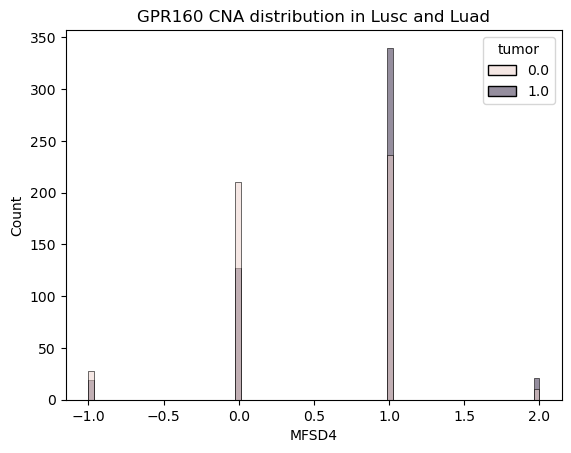

In [20]:
plot_df = lusc_luad_cna.join(tumor_type)
sns.histplot(plot_df, x='MFSD4', hue='tumor', bins=80)
plt.title('GPR160 CNA distribution in Lusc and Luad')
#plt.savefig('GPR160_cna_dist.pdf')

Text(0.5, 1.0, 'HIST2H3D distribution in Lusc and Luad')

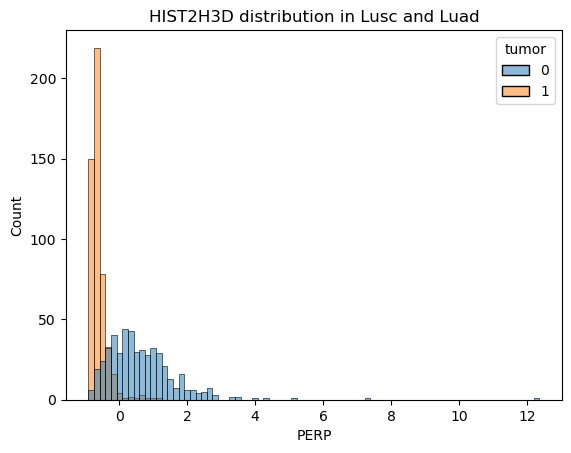

In [24]:
plot_df = lusc_luad_rna_exp.join(tumor_type)
sns.histplot(plot_df, x='PERP', hue='tumor', bins=80)
plt.title('HIST2H3D distribution in Lusc and Luad')
#plt.savefig('GPR160_cna_dist.pdf')

In [22]:
import gseapy as gp

In [23]:
def prerank_gsea(rf_importances, gene_list):
    gene_sets='../data/reactome/ReactomePathways.gmt''
    gene_importance_scores = pd.DataFrame(columns=gene_list)
    for row in pd.DataFrame(rf_importances).values:
        new_row = pd.DataFrame([row.reshape((gene_input_number,-1)).sum(axis=0)], columns=gene_list)
        gene_importance_scores = pd.concat([gene_importance_scores, new_row])
        
    gene_importance_scores = pd.DataFrame(gene_importance_scores.mean().T.copy())
    pre_res = gp.prerank(rnk=gene_importance_scores,
                         gene_sets = gene_sets,
                         threads=8,
                         min_size=5,
                         max_size=1000,
                         permutation_num=1000,
                         outdir='broad_poster_figures/prerank_gsea',
                         seed=6,
                         verbose=True
                        )
    return pre_res

SyntaxError: unterminated string literal (detected at line 2) (1388222390.py, line 2)

In [ ]:
pre_res = prerank_gsea(heterogeneity_rf_importances, skcm_exp.columns)

In [31]:
rn = model.hparams.reactome_network

In [34]:
rn.pathway_encoding.loc[len(rn.pathway_encoding)] = ['residual', 'residual', 'Homo sapiens']

In [38]:
layerwise_importance_scores = model.layerwise_importance(test_dataset)

In [41]:
for layer in layerwise_importance_scores:
    print(layer.nlargest(10))
    print('\n')

Collagen chain trimerization                           1.728410
G alpha (s) signalling events                          1.716029
L1CAM interactions                                     1.463485
RAF/MAP kinase cascade                                 1.024958
Interleukin-10 signaling                               0.997554
Constitutive Signaling by Aberrant PI3K in Cancer      0.596213
NOTCH1 Intracellular Domain Regulates Transcription    0.545388
NOTCH4 Intracellular Domain Regulates Transcription    0.529455
Interleukin-4 and Interleukin-13 signaling             0.517762
Bicarbonate transporters                               0.477514
dtype: float32


Assembly of collagen fibrils and other multimeric structures                4.894593
Neutrophil degranulation                                                    4.812471
Pyroptosis                                                                  4.172033
Immunoregulatory interactions between a Lymphoid and a non-Lymphoid cell    2.768315
Sig